# Hand Written Digit Recognition with TensorFlow and Keras

In this project I tried to build a deep learning neural network model that can detect hand written digits using TensorFlow and Keras. The dataset is gotten from Keras.

In [3]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
keras.backend.backend()

'tensorflow'

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
X_train[0].shape

(28, 28)

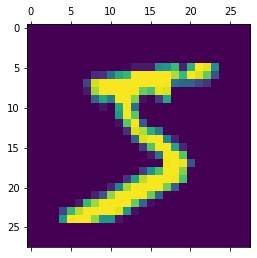

In [9]:
plt.matshow(X_train[0])
plt.savefig('number.png')

In [34]:
y_train[0]

5

In [35]:
X_train = X_train/255
X_test = X_test/255

In [36]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [37]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [38]:
model = Sequential()

In [39]:
model.add(Flatten(input_shape = [28,28]))


model.add(Dense(100, activation='relu'))

model.add(Dense(10,activation = 'sigmoid'))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [42]:
model.fit(X_train,y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2748 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1278 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0912 - accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0698 - accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0556 - accuracy: 0.9826


In [43]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0972 - accuracy: 0.9711


[0.09724918752908707, 0.9710999727249146]

In [44]:
y_predicted = model.predict(X_test)

In [45]:
y_predicted[0]

array([4.8771501e-04, 5.1702737e-05, 6.0816801e-01, 8.7798071e-01,
       4.9815349e-05, 4.0560663e-03, 4.3175152e-09, 9.9996340e-01,
       2.9191166e-02, 4.4620824e-01], dtype=float32)

In [46]:
np.argmax(y_predicted[0])

7

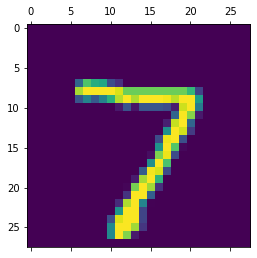

In [47]:
plt.matshow(X_test[0])

In [48]:
y_predicted_labels = []

for i in y_predicted:
  y_predicted_labels.append(np.argmax(i))

In [49]:
cnn = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cnn

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    0,    1,    1,    0,    1,    0,    2,    2],
       [   0, 1117,    2,    1,    4,    1,    2,    0,    7,    1],
       [   9,    3,  982,    8,    5,    0,    3,    7,   14,    1],
       [   0,    0,    2,  976,    0,   18,    0,    4,    8,    2],
       [   0,    0,    2,    1,  972,    1,    1,    0,    0,    5],
       [   3,    0,    0,    2,    1,  881,    2,    0,    2,    1],
       [   8,    2,    0,    1,    9,   22,  912,    0,    4,    0],
       [   2,    4,    6,    5,    9,    0,    0,  980,    5,   17],
       [   4,    0,    2,    3,    7,   13,    0,    2,  937,    6],
       [   2,    2,    0,    2,   12,    7,    0,    0,    3,  981]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

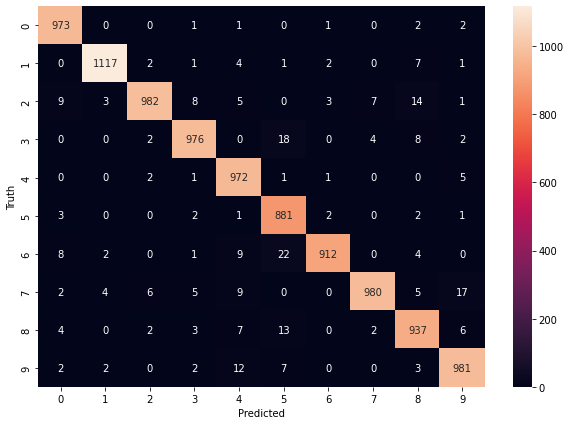

In [50]:
import seaborn as sns

plt.figure(figsize = (10,7))
sns.heatmap(cnn, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

The confusion matrix above helps us better to see the accuracy of digit predictions.